This notebook serves to investigate 
1. whether we can find eps/delta TF expression in subclusters of Ngn3 already
2. compare delta TF expression in values in eps. progenitors with all Ngn3 cells to find whether delta TFs are expressed significantly

In [1]:
import scanpy as sc
import pandas as pd

In [34]:
adata = sc.read("/Users/dominik.klein/data/pancreas_multiome_2022_processed.h5ad")

In [35]:
adata = adata[:, adata.var["modality"]=="GEX"].copy()

In [36]:
new_annotations = pd.read_csv("/Users/dominik.klein/paper_writing/moscot/endocrine_refinement.csv")
new_annotations.set_index(keys='Unnamed: 0' ,inplace=True)

In [37]:
adata.obs = adata.obs.merge(new_annotations, left_index=True, right_index=True)

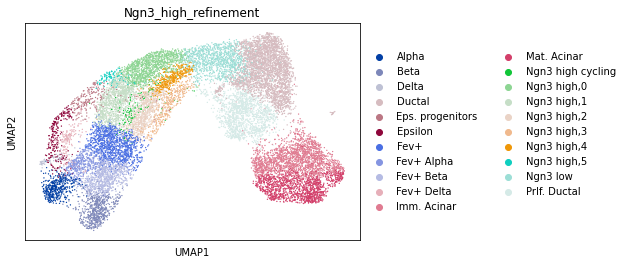

In [17]:
sc.pl.umap(adata, color='Ngn3_high_refinement')

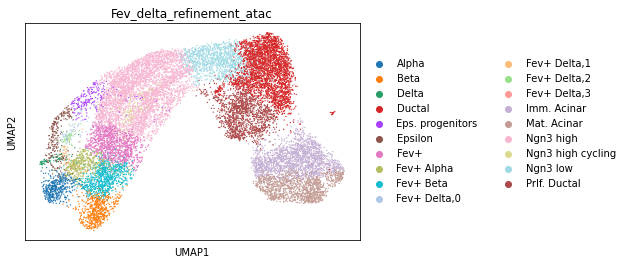

In [40]:
sc.pl.umap(adata, color='Fev_delta_refinement_atac')

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

In [19]:
adata = adata[adata.obs["celltype"].isin(["Eps. progenitors", "Ngn3 high"])].copy()

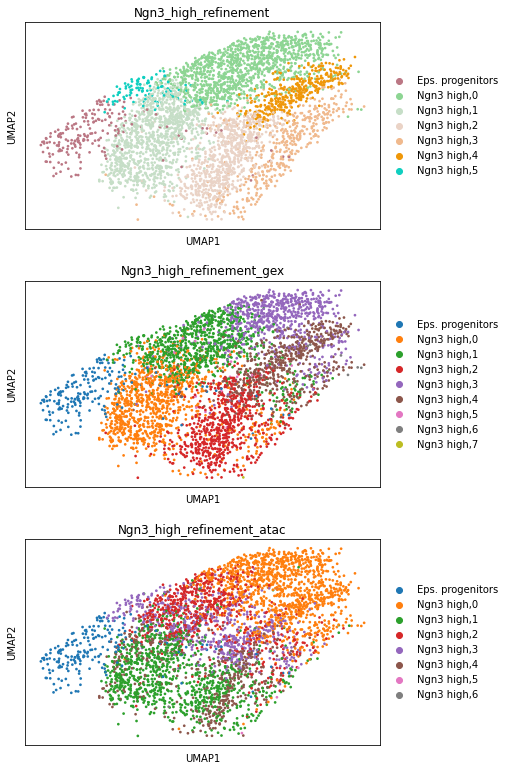

In [24]:
sc.pl.umap(adata, color=['Ngn3_high_refinement', 'Ngn3_high_refinement_gex', 'Ngn3_high_refinement_atac'], ncols=1)

In [25]:
adata.obs['Ngn3_high_refinement_gex'].value_counts()

Ngn3 high,0         1000
Ngn3 high,1          912
Ngn3 high,2          709
Ngn3 high,3          694
Ngn3 high,4          548
Eps. progenitors     204
Ngn3 high,5           27
Ngn3 high,6            7
Ngn3 high,7            1
Name: Ngn3_high_refinement_gex, dtype: int64

In [29]:
adata.obs['Ngn3_high_refinement_atac'].value_counts()

Ngn3 high,0         1147
Ngn3 high,1         1022
Ngn3 high,2          703
Ngn3 high,3          547
Ngn3 high,4          474
Eps. progenitors     204
Ngn3 high,5            4
Ngn3 high,6            1
Name: Ngn3_high_refinement_atac, dtype: int64

In [8]:
eps_TFs = ["Rfx2", "Gata6", "Nkx2-2", "Prox1"]

In [9]:
delta_TFs = ["Hhex", "Isl1", "Tsc22d1", "Fos", "Egr1", "Junb"]

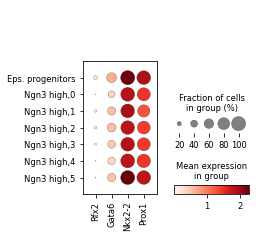

In [10]:
sc.pl.dotplot(adata, eps_TFs, groupby='Ngn3_high_refinement')

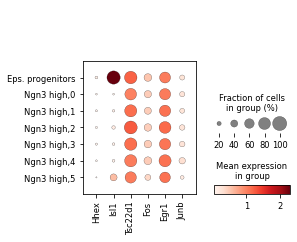

In [11]:
sc.pl.dotplot(adata, delta_TFs, groupby='Ngn3_high_refinement')

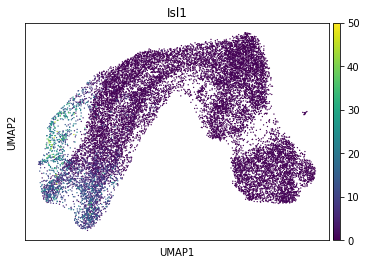

In [41]:
sc.pl.umap(adata, color="Isl1")

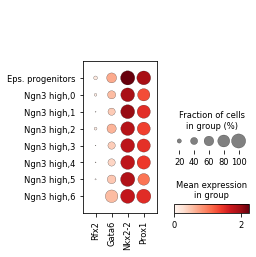

In [26]:
adata_red = adata[~adata.obs['Ngn3_high_refinement_gex'].isin(["Ngn3 high,7"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, eps_TFs, groupby='Ngn3_high_refinement_gex')

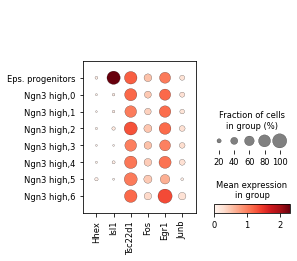

In [28]:
sc.pl.dotplot(adata_red, delta_TFs, groupby='Ngn3_high_refinement_gex')

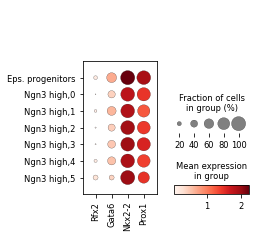

In [30]:
adata_red = adata[~adata.obs['Ngn3_high_refinement_atac'].isin(["Ngn3 high,6"])].copy() # they only contain 1 cell
sc.pl.dotplot(adata_red, eps_TFs, groupby='Ngn3_high_refinement_atac')

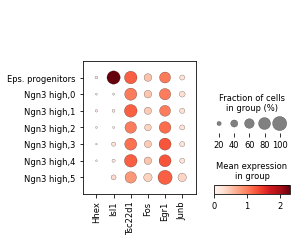

In [32]:
sc.pl.dotplot(adata_red, delta_TFs, groupby='Ngn3_high_refinement_atac')

## Conclusion: Delta TF "ISL1" is clearly expressed in Eps. progenitors --> Eps. progenitors are also Delta progenitors/